In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Пути до файлов.
folder = os.getcwd()
files_folder = fr'{folder}\files'

test_file = f'{files_folder}\data_test.csv'

# Создадим датафрейм.
df = pd.read_csv(test_file, sep=';')
# Заменим NAN на 0.
df.fillna(0, inplace=True)

df.head()


,CLIENT_ID,VALUE_DAY,DIGITAL_30_CNT,TRAN_ACTIVE_30_CNT,OPER_ACTIVE_30_CNT
0,3596869440,30.09.2021,18.0,8.0,9.0
1,181778433,30.09.2021,7.0,3.0,3.0
2,4271531990,30.09.2021,2.0,0.0,0.0
3,3949165697,30.09.2021,15.0,4.0,5.0
4,1926920317,30.09.2021,3.0,0.0,0.0


VALUE_DAY
28.02.2022    139215
30.09.2021    129232
30.11.2021    133009
31.01.2022    136771
31.10.2021    131637
31.12.2021    135957
Name: VALUE_DAY, dtype: int64


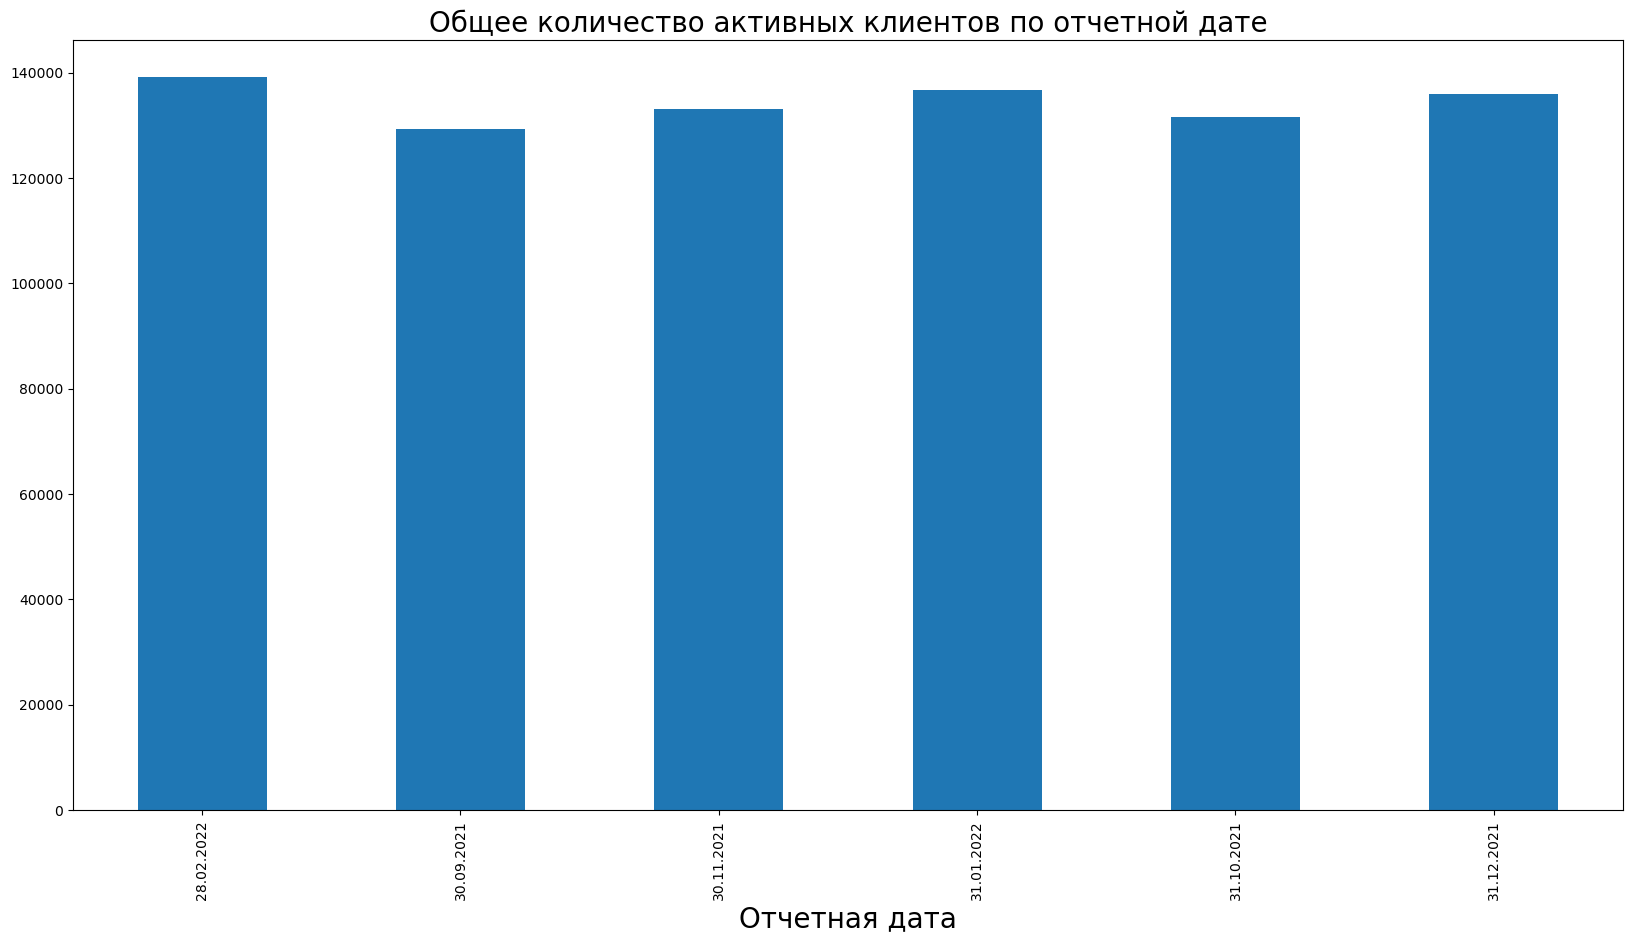

In [42]:
# Создадим датафрейм с количеством активных клиентов банка по отчетной дате.
df_count_by_value_day = df[['CLIENT_ID', 'VALUE_DAY']].groupby('VALUE_DAY')['VALUE_DAY'].agg('count')

print(df_count_by_value_day)

# И построим соответствующий график.
plt.rcParams["figure.figsize"] = (20,10)
df_count_by_value_day.plot(kind = 'bar')
plt.title('Общее количество активных клиентов по отчетной дате', fontsize=20)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xlabel('Отчетная дата', horizontalalignment='center', fontsize=20)
plt.show()


VALUE_DAY
28.02.2022    123690
30.09.2021    112885
30.11.2021    116863
31.01.2022    120267
31.10.2021    114998
31.12.2021    119976
Name: VALUE_DAY, dtype: int64


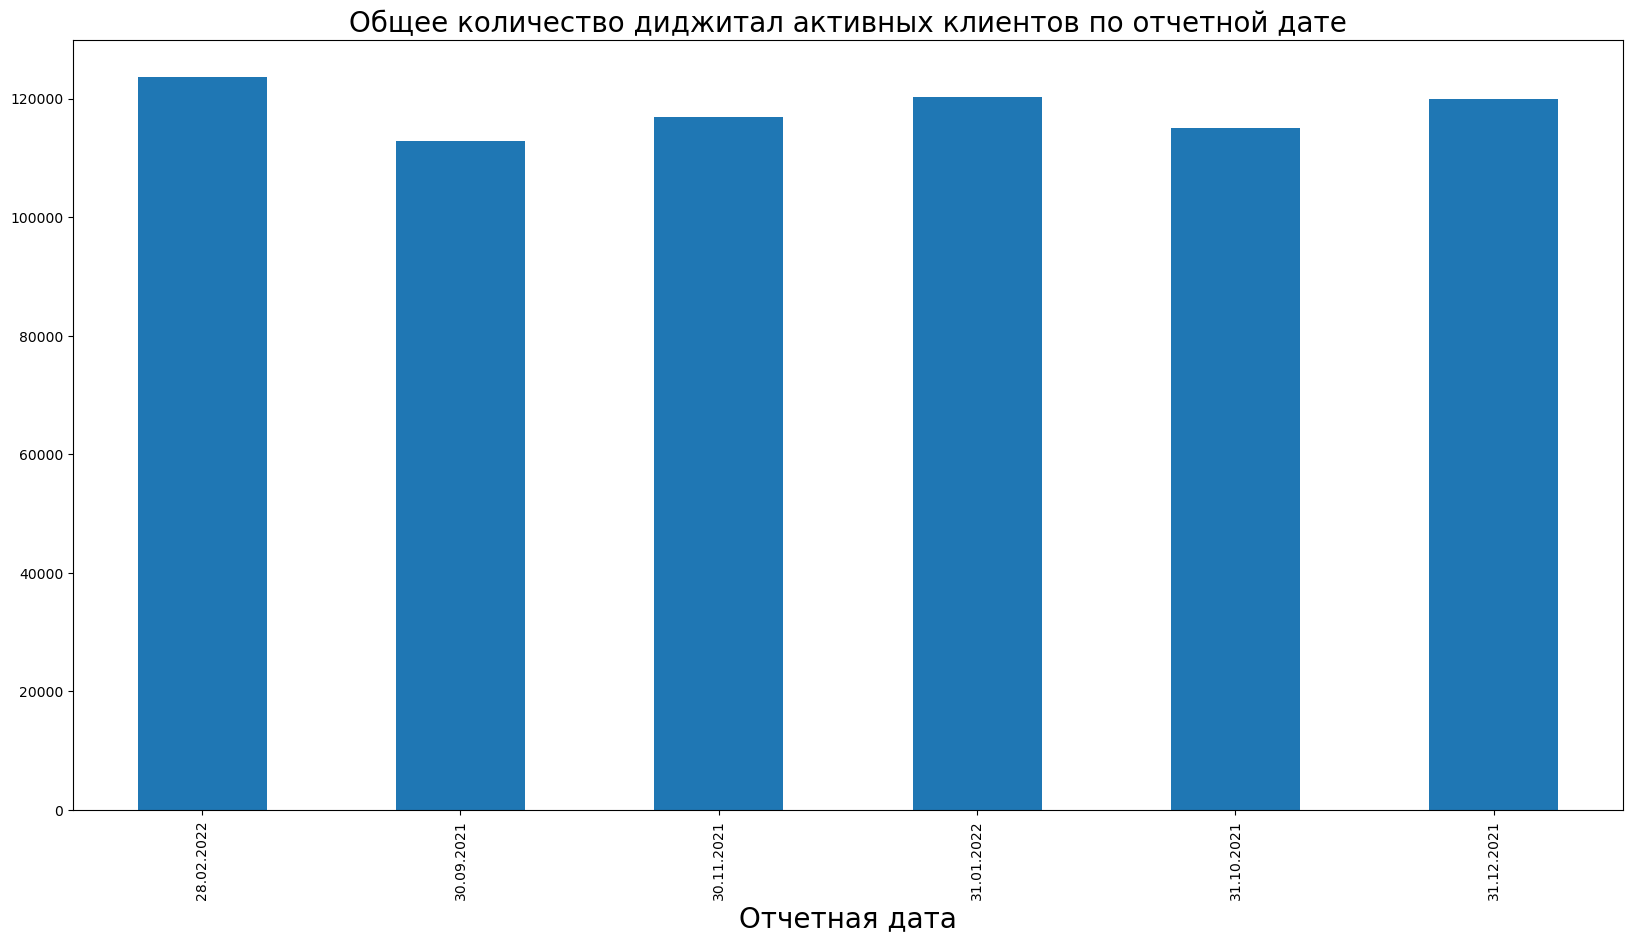

In [37]:
# Создадим датафрейм с количеством диджитал активных клиентов банка по отчетной дате.
df_count_digital_by_value_day = df[df['DIGITAL_30_CNT'] != 0].groupby('VALUE_DAY')['VALUE_DAY'].agg('count')

print(df_count_digital_by_value_day)

# И построим соответствующий график.
plt.rcParams["figure.figsize"] = (20,10)
df_count_digital_by_value_day.plot(kind = 'bar')
plt.title('Общее количество диджитал активных клиентов по отчетной дате', fontsize=20)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xlabel('Отчетная дата', horizontalalignment='center', fontsize=20)
plt.show()


VALUE_DAY
28.02.2022    100290
30.09.2021     85414
30.11.2021     91616
31.01.2022     95749
31.10.2021     88108
31.12.2021     97769
Name: VALUE_DAY, dtype: int64


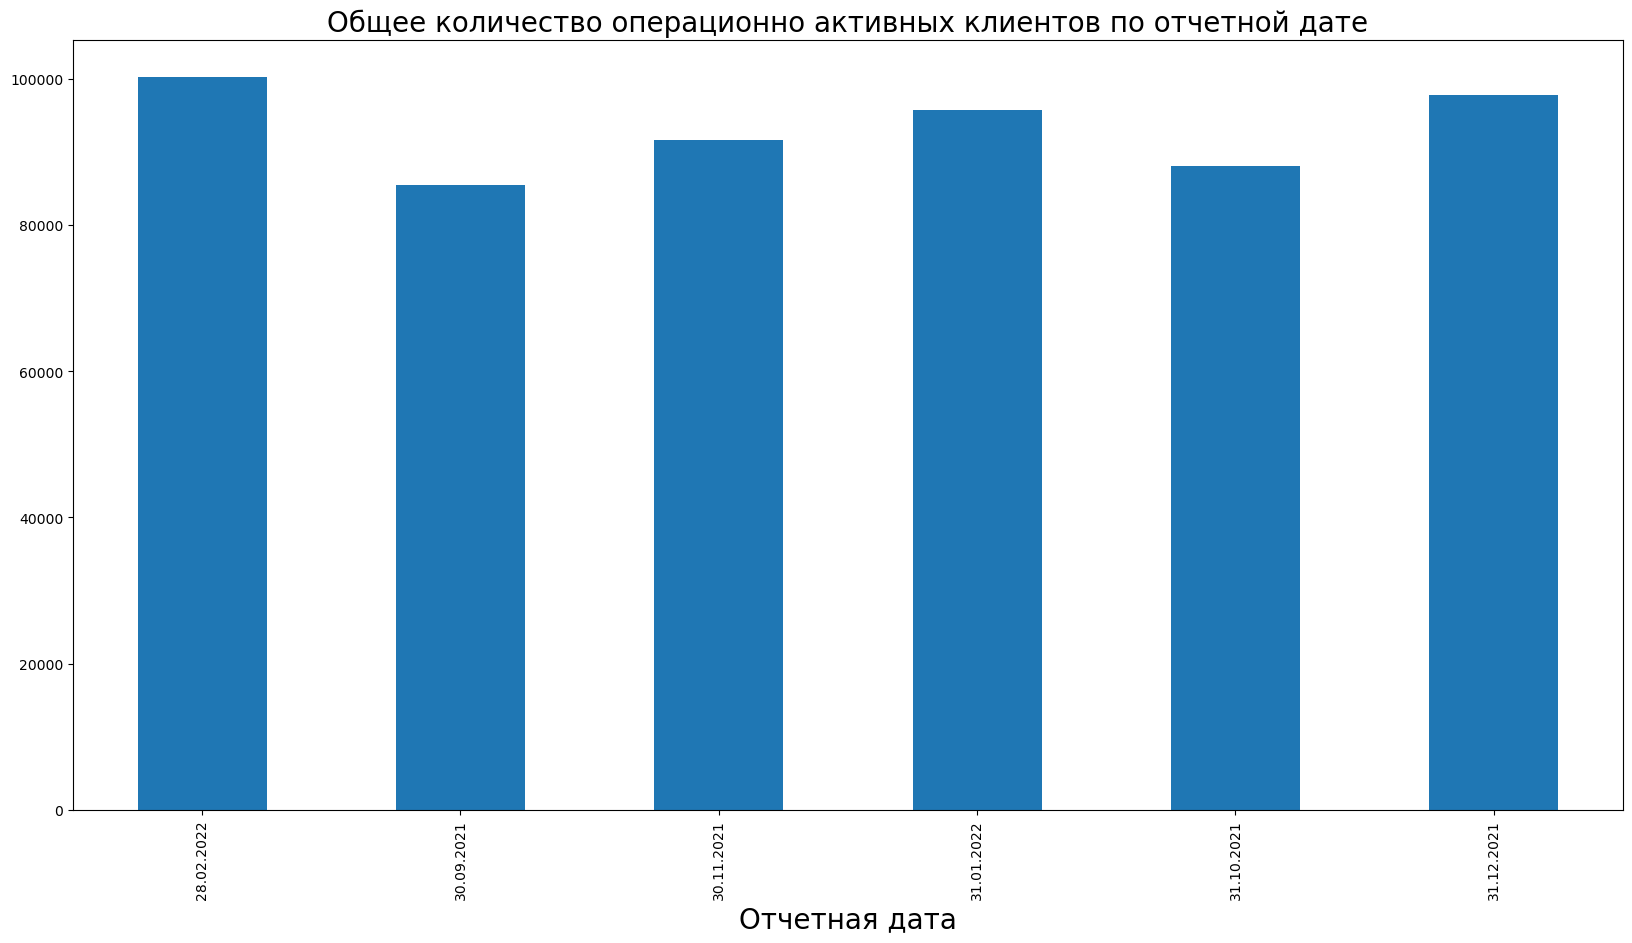

In [9]:
# Создадим датафрейм с количеством операционно активных клиентов банка по отчетной дате.
df_count_oper_by_value_day = df[df['OPER_ACTIVE_30_CNT'] != 0].groupby('VALUE_DAY')['VALUE_DAY'].agg('count')

print(df_count_oper_by_value_day)

# И построим соответствующий график.
plt.rcParams["figure.figsize"] = (20,10)
df_count_oper_by_value_day.plot(kind = 'bar')
plt.title('Общее количество операционно активных клиентов по отчетной дате', fontsize=20)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xlabel('Отчетная дата', horizontalalignment='center', fontsize=20)
plt.show()


VALUE_DAY
28.02.2022    91643
30.09.2021    78372
30.11.2021    83634
31.01.2022    86558
31.10.2021    81411
31.12.2021    87133
Name: VALUE_DAY, dtype: int64


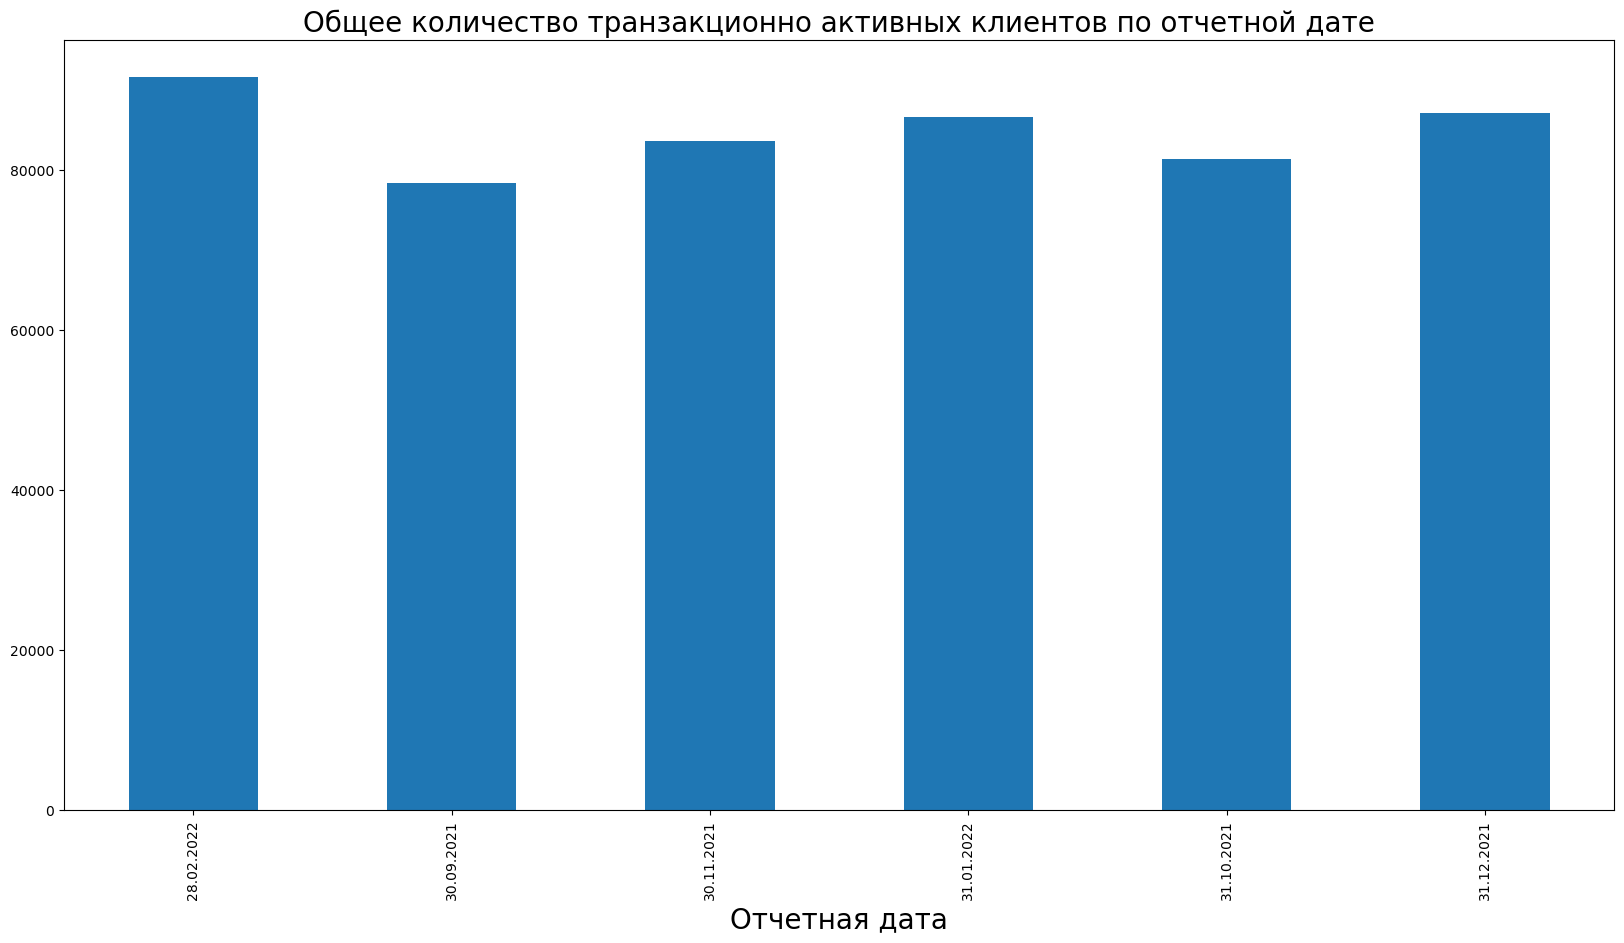

In [10]:
# Создадим датафрейм с количеством транзакционно активных клиентов банка по отчетной дате.
df_count_tran_by_value_day = df[df['TRAN_ACTIVE_30_CNT'] != 0].groupby('VALUE_DAY')['VALUE_DAY'].agg('count')

print(df_count_tran_by_value_day)

# И построим соответствующий график.
plt.rcParams["figure.figsize"] = (20,10)
df_count_tran_by_value_day.plot(kind = 'bar')
plt.title('Общее количество транзакционно активных клиентов по отчетной дате', fontsize=20)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xlabel('Отчетная дата', horizontalalignment='center', fontsize=20)
plt.show()


            TRAN_ACTIVE_30_CNT  DIGITAL_30_CNT
VALUE_DAY                                     
28.02.2022               91643          123690
30.09.2021               78372          112885
30.11.2021               83634          116863
31.01.2022               86558          120267
31.10.2021               81411          114998
31.12.2021               87133          119976


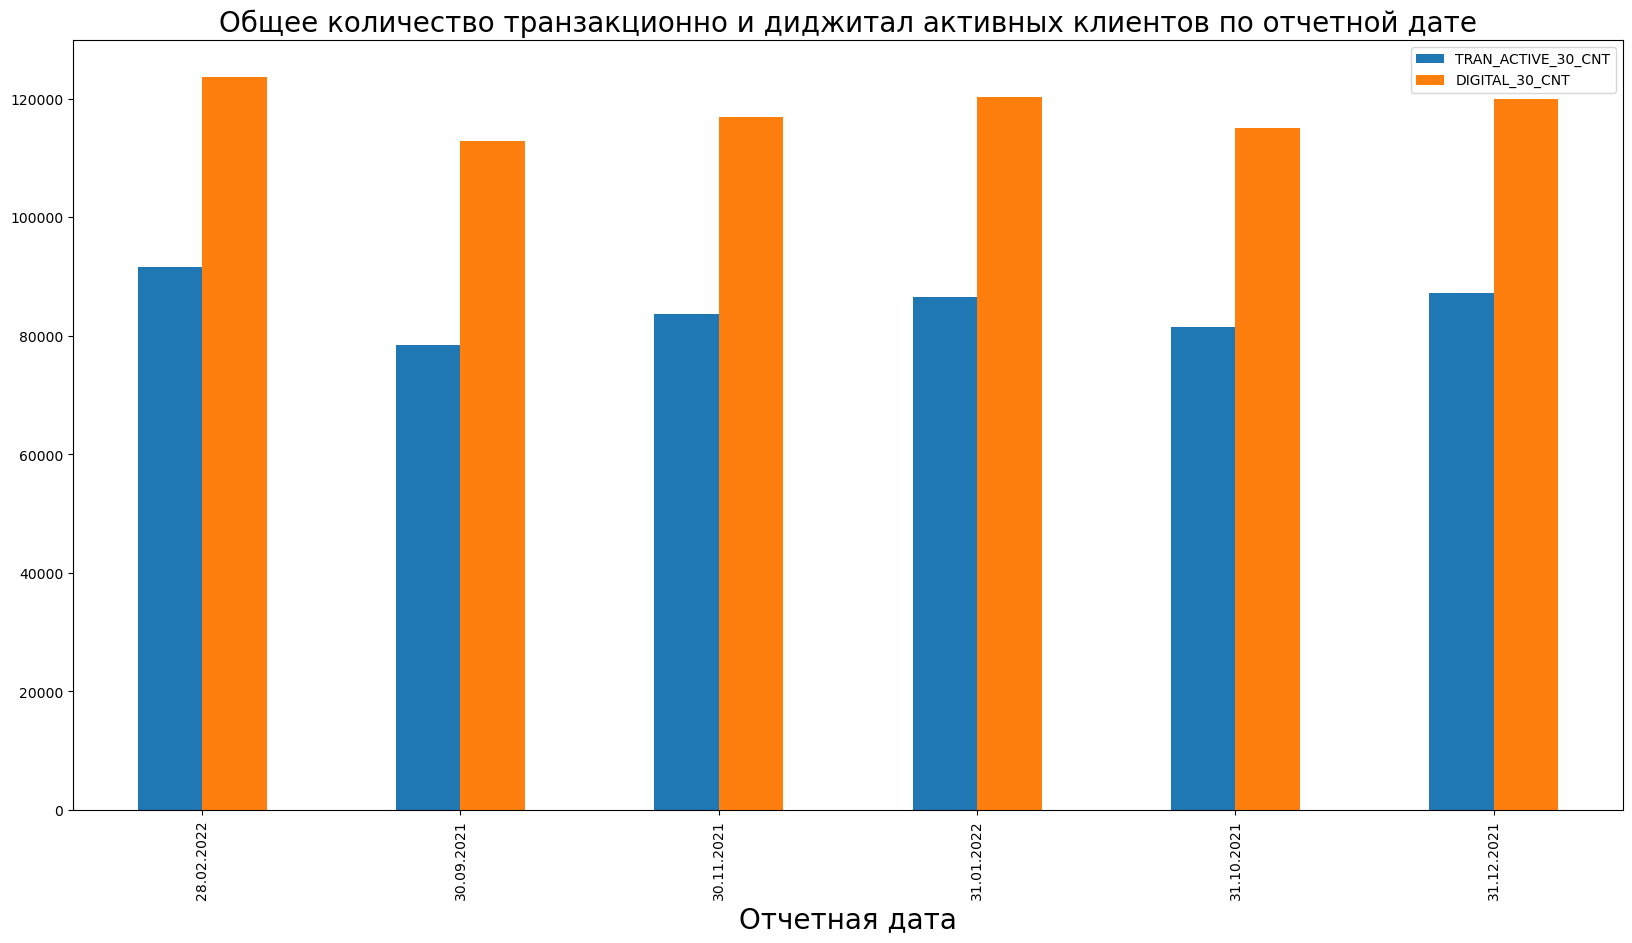

In [39]:
# Создадим датафрейм с количеством транзакционно и диджитал активных клиентов банка по отчетной дате.
df_tran_digital = df[['VALUE_DAY', 'TRAN_ACTIVE_30_CNT', 'DIGITAL_30_CNT']].groupby('VALUE_DAY')[['TRAN_ACTIVE_30_CNT', 'DIGITAL_30_CNT']].agg(lambda column: (column != 0).sum())

print(df_tran_digital)

# И построим соответствующие графики.
plt.rcParams["figure.figsize"] = (20,10)
df_tran_digital.plot(kind = 'bar')
plt.title('Общее количество транзакционно и диджитал активных клиентов по отчетной дате', fontsize=20)
plt.ticklabel_format(style = 'plain', axis='y')
plt.xlabel('Отчетная дата', horizontalalignment='center', fontsize=20)
plt.show()


В качестве гипотезы можно проверить то, что именно приводит диджитал клиентов в транзакционно активную категорию.
И провести параллель, чего именно не хватает, чтобы дойти до транзакционно активной категории. 
Быть может удобство оплаты с телефона?